# Perceptron Vs MLP

In this notebook, we'll compare the performance of a perceptron and MLP on a non-linear classification task. We can visually see fow both the models perform in this challenge.

In [7]:
# functioning for generating toy 2D data
import numpy as np # Numpy library is used to work with array. Example: create or modify an array.
def gen_data(n=500):
    x = np.random.randn(n, 2)
    y_ = np.product(x, axis=1) > 0
    y = np.array(y_, dtype=np.int8)
    return(x, y)

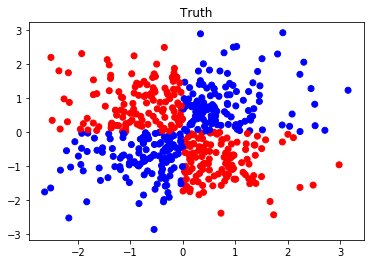

In [8]:
# plt is a visualization module in matplotlib.  
import matplotlib.pyplot as plt

# Generating random samples of two different classes
x_train, y_train = gen_data()

plt.scatter(x_train[:,0], x_train[:,1], color=[['red', 'blue'][x] for x in y_train])
plt.title('Truth')
plt.show()

In [9]:
# keras is a platform for building and training neural networks. 
# Sequential is a container which stores the layers in order. 
# Think of it as a train engine to which you can keep adding train cars. train car in our context will be a layer.
# 'Dense' is a fully connected layer feedforward layer.

import keras
from keras.layers import Dense
from keras .models import Sequential 

Using TensorFlow backend.


In [10]:
# Building a perceptron model
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Training a perceptron model on the 2D data
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
500/500 [==============================] - 0s 381us/step - loss: 0.7438 - acc: 0.4920
Epoch 2/20
500/500 [==============================] - 0s 34us/step - loss: 0.7417 - acc: 0.4940
Epoch 3/20
500/500 [==============================] - 0s 39us/step - loss: 0.7397 - acc: 0.4940
Epoch 4/20
500/500 [==============================] - 0s 28us/step - loss: 0.7376 - acc: 0.4960
Epoch 5/20
500/500 [==============================] - 0s 34us/step - loss: 0.7359 - acc: 0.4960
Epoch 6/20
500/500 [==============================] - 0s 40us/step - loss: 0.7339 - acc: 0.4980
Epoch 7/20
500/500 [==============================] - 0s 34us/step - loss: 0.7322 - acc: 0.4980
Epoch 8/20
500/500 [==============================] - 0s 28us/step - loss: 0.7306 - acc: 0.4980
Epoch 9/20
500/500 [==============================] - 0s 38us/step - loss: 0.7291 - acc: 0.4980
Epoch 10/20
500/500 [==============================] - 0s 35us/step - loss: 0.7273 - acc: 0.4980
Epoch 11/20
500/500 [=================

In [16]:
# Generating test data
x_test, y_test = gen_data(1000)

# Predicting the class label for the test data
plt.rcParams['figure.figsize'] = 8, 4
preds = model.predict_classes(x_test).reshape(-1,).astype(np.int8)

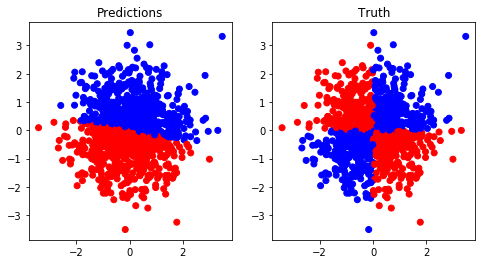

In [17]:
# Ploting the predictions of the perceptron model against ground truth
plt.subplot(121)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in preds])
plt.title('Predictions')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in y_test])
plt.title('Truth')
plt.show()

In [19]:
# 'optimizers' in keras has several variations of gradient decsent that are used for updating weights
from keras import optimizers 

# Building an MLP model with single hidden layer
model2 = Sequential()
model2.add(Dense(8, input_shape=(2,), activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))
SGD = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer=SGD,
      loss='binary_crossentropy',
      metrics=['accuracy'])

In [37]:
# 'optimizers' in keras has several variations of gradient decsent that are used for updating weights
from keras import optimizers 

# Building an MLP model with single hidden layer
model2 = Sequential()
model2.add(Dense(3, input_shape=(2,), activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))
SGD = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer=SGD,
      loss='binary_crossentropy',
      metrics=['accuracy'])

In [38]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Training the MLP on the 2D data
model2.fit(x_train, y_train, epochs=1000, verbose=2)

Epoch 1/1000
 - 0s - loss: 0.7036 - acc: 0.5340
Epoch 2/1000
 - 0s - loss: 0.7087 - acc: 0.5020
Epoch 3/1000
 - 0s - loss: 0.6947 - acc: 0.4700
Epoch 4/1000
 - 0s - loss: 0.6951 - acc: 0.4420
Epoch 5/1000
 - 0s - loss: 0.6956 - acc: 0.4340
Epoch 6/1000
 - 0s - loss: 0.6946 - acc: 0.5440
Epoch 7/1000
 - 0s - loss: 0.6928 - acc: 0.5160
Epoch 8/1000
 - 0s - loss: 0.6934 - acc: 0.5120
Epoch 9/1000
 - 0s - loss: 0.6978 - acc: 0.4720
Epoch 10/1000
 - 0s - loss: 0.6892 - acc: 0.5240
Epoch 11/1000
 - 0s - loss: 0.6868 - acc: 0.5400
Epoch 12/1000
 - 0s - loss: 0.6905 - acc: 0.5220
Epoch 13/1000
 - 0s - loss: 0.6792 - acc: 0.5780
Epoch 14/1000
 - 0s - loss: 0.6742 - acc: 0.5980
Epoch 15/1000
 - 0s - loss: 0.6646 - acc: 0.6340
Epoch 16/1000
 - 0s - loss: 0.6538 - acc: 0.6700
Epoch 17/1000
 - 0s - loss: 0.6366 - acc: 0.6820
Epoch 18/1000
 - 0s - loss: 0.6193 - acc: 0.7540
Epoch 19/1000
 - 0s - loss: 0.5946 - acc: 0.7720
Epoch 20/1000
 - 0s - loss: 0.5715 - acc: 0.7900
Epoch 21/1000
 - 0s - loss: 0

 - 0s - loss: 0.2733 - acc: 0.8900
Epoch 168/1000
 - 0s - loss: 0.2771 - acc: 0.8760
Epoch 169/1000
 - 0s - loss: 0.2741 - acc: 0.8740
Epoch 170/1000
 - 0s - loss: 0.2773 - acc: 0.8740
Epoch 171/1000
 - 0s - loss: 0.2707 - acc: 0.8880
Epoch 172/1000
 - 0s - loss: 0.2713 - acc: 0.8780
Epoch 173/1000
 - 0s - loss: 0.2713 - acc: 0.8780
Epoch 174/1000
 - 0s - loss: 0.2742 - acc: 0.8820
Epoch 175/1000
 - 0s - loss: 0.2760 - acc: 0.8860
Epoch 176/1000
 - 0s - loss: 0.2702 - acc: 0.8900
Epoch 177/1000
 - 0s - loss: 0.2707 - acc: 0.8780
Epoch 178/1000
 - 0s - loss: 0.2728 - acc: 0.8820
Epoch 179/1000
 - 0s - loss: 0.2753 - acc: 0.8760
Epoch 180/1000
 - 0s - loss: 0.2736 - acc: 0.8740
Epoch 181/1000
 - 0s - loss: 0.2748 - acc: 0.8760
Epoch 182/1000
 - 0s - loss: 0.2735 - acc: 0.8860
Epoch 183/1000
 - 0s - loss: 0.2730 - acc: 0.8800
Epoch 184/1000
 - 0s - loss: 0.2697 - acc: 0.8900
Epoch 185/1000
 - 0s - loss: 0.2703 - acc: 0.8940
Epoch 186/1000
 - 0s - loss: 0.2793 - acc: 0.8740
Epoch 187/1000


 - 0s - loss: 0.2598 - acc: 0.8760
Epoch 332/1000
 - 0s - loss: 0.2534 - acc: 0.8900
Epoch 333/1000
 - 0s - loss: 0.2499 - acc: 0.8880
Epoch 334/1000
 - 0s - loss: 0.2560 - acc: 0.8880
Epoch 335/1000
 - 0s - loss: 0.2550 - acc: 0.8880
Epoch 336/1000
 - 0s - loss: 0.2560 - acc: 0.8820
Epoch 337/1000
 - 0s - loss: 0.2556 - acc: 0.8820
Epoch 338/1000
 - 0s - loss: 0.2507 - acc: 0.9000
Epoch 339/1000
 - 0s - loss: 0.2615 - acc: 0.8860
Epoch 340/1000
 - 0s - loss: 0.2550 - acc: 0.8840
Epoch 341/1000
 - 0s - loss: 0.2613 - acc: 0.8840
Epoch 342/1000
 - 0s - loss: 0.2498 - acc: 0.8900
Epoch 343/1000
 - 0s - loss: 0.2543 - acc: 0.8900
Epoch 344/1000
 - 0s - loss: 0.2555 - acc: 0.8900
Epoch 345/1000
 - 0s - loss: 0.2553 - acc: 0.8820
Epoch 346/1000
 - 0s - loss: 0.2531 - acc: 0.8780
Epoch 347/1000
 - 0s - loss: 0.2595 - acc: 0.8740
Epoch 348/1000
 - 0s - loss: 0.2589 - acc: 0.8840
Epoch 349/1000
 - 0s - loss: 0.2562 - acc: 0.8900
Epoch 350/1000
 - 0s - loss: 0.2561 - acc: 0.8760
Epoch 351/1000


 - 0s - loss: 0.2489 - acc: 0.8900
Epoch 496/1000
 - 0s - loss: 0.2417 - acc: 0.8960
Epoch 497/1000
 - 0s - loss: 0.2493 - acc: 0.8900
Epoch 498/1000
 - 0s - loss: 0.2430 - acc: 0.9000
Epoch 499/1000
 - 0s - loss: 0.2469 - acc: 0.8880
Epoch 500/1000
 - 0s - loss: 0.2439 - acc: 0.8980
Epoch 501/1000
 - 0s - loss: 0.2528 - acc: 0.8800
Epoch 502/1000
 - 0s - loss: 0.2473 - acc: 0.8940
Epoch 503/1000
 - 0s - loss: 0.2546 - acc: 0.8840
Epoch 504/1000
 - 0s - loss: 0.2366 - acc: 0.8980
Epoch 505/1000
 - 0s - loss: 0.2390 - acc: 0.8940
Epoch 506/1000
 - 0s - loss: 0.2470 - acc: 0.8960
Epoch 507/1000
 - 0s - loss: 0.2498 - acc: 0.8860
Epoch 508/1000
 - 0s - loss: 0.2490 - acc: 0.8820
Epoch 509/1000
 - 0s - loss: 0.2453 - acc: 0.8860
Epoch 510/1000
 - 0s - loss: 0.2480 - acc: 0.8920
Epoch 511/1000
 - 0s - loss: 0.2484 - acc: 0.8900
Epoch 512/1000
 - 0s - loss: 0.2379 - acc: 0.8940
Epoch 513/1000
 - 0s - loss: 0.2472 - acc: 0.8900
Epoch 514/1000
 - 0s - loss: 0.2460 - acc: 0.8960
Epoch 515/1000


 - 0s - loss: 0.2325 - acc: 0.9040
Epoch 660/1000
 - 0s - loss: 0.2388 - acc: 0.9020
Epoch 661/1000
 - 0s - loss: 0.2327 - acc: 0.8960
Epoch 662/1000
 - 0s - loss: 0.2390 - acc: 0.8920
Epoch 663/1000
 - 0s - loss: 0.2316 - acc: 0.8920
Epoch 664/1000
 - 0s - loss: 0.2468 - acc: 0.8900
Epoch 665/1000
 - 0s - loss: 0.2469 - acc: 0.8900
Epoch 666/1000
 - 0s - loss: 0.2351 - acc: 0.9080
Epoch 667/1000
 - 0s - loss: 0.2367 - acc: 0.8960
Epoch 668/1000
 - 0s - loss: 0.2340 - acc: 0.8960
Epoch 669/1000
 - 0s - loss: 0.2473 - acc: 0.8800
Epoch 670/1000
 - 0s - loss: 0.2351 - acc: 0.8900
Epoch 671/1000
 - 0s - loss: 0.2353 - acc: 0.9000
Epoch 672/1000
 - 0s - loss: 0.2333 - acc: 0.9020
Epoch 673/1000
 - 0s - loss: 0.2309 - acc: 0.8920
Epoch 674/1000
 - 0s - loss: 0.2346 - acc: 0.9040
Epoch 675/1000
 - 0s - loss: 0.2506 - acc: 0.8960
Epoch 676/1000
 - 0s - loss: 0.2482 - acc: 0.8920
Epoch 677/1000
 - 0s - loss: 0.2335 - acc: 0.8920
Epoch 678/1000
 - 0s - loss: 0.2369 - acc: 0.9020
Epoch 679/1000


 - 0s - loss: 0.2313 - acc: 0.8980
Epoch 824/1000
 - 0s - loss: 0.2312 - acc: 0.9020
Epoch 825/1000
 - 0s - loss: 0.2267 - acc: 0.9020
Epoch 826/1000
 - 0s - loss: 0.2436 - acc: 0.8960
Epoch 827/1000
 - 0s - loss: 0.2291 - acc: 0.8940
Epoch 828/1000
 - 0s - loss: 0.2421 - acc: 0.8920
Epoch 829/1000
 - 0s - loss: 0.2411 - acc: 0.8900
Epoch 830/1000
 - 0s - loss: 0.2250 - acc: 0.9120
Epoch 831/1000
 - 0s - loss: 0.2358 - acc: 0.8860
Epoch 832/1000
 - 0s - loss: 0.2276 - acc: 0.9040
Epoch 833/1000
 - 0s - loss: 0.2292 - acc: 0.9020
Epoch 834/1000
 - 0s - loss: 0.2372 - acc: 0.8980
Epoch 835/1000
 - 0s - loss: 0.2316 - acc: 0.9000
Epoch 836/1000
 - 0s - loss: 0.2356 - acc: 0.8800
Epoch 837/1000
 - 0s - loss: 0.2367 - acc: 0.8900
Epoch 838/1000
 - 0s - loss: 0.2426 - acc: 0.8880
Epoch 839/1000
 - 0s - loss: 0.2303 - acc: 0.8860
Epoch 840/1000
 - 0s - loss: 0.2298 - acc: 0.9000
Epoch 841/1000
 - 0s - loss: 0.2293 - acc: 0.8880
Epoch 842/1000
 - 0s - loss: 0.2393 - acc: 0.8980
Epoch 843/1000


 - 0s - loss: 0.2235 - acc: 0.8960
Epoch 988/1000
 - 0s - loss: 0.2275 - acc: 0.8920
Epoch 989/1000
 - 0s - loss: 0.2267 - acc: 0.8980
Epoch 990/1000
 - 0s - loss: 0.2382 - acc: 0.8980
Epoch 991/1000
 - 0s - loss: 0.2373 - acc: 0.8880
Epoch 992/1000
 - 0s - loss: 0.2285 - acc: 0.9000
Epoch 993/1000
 - 0s - loss: 0.2204 - acc: 0.9020
Epoch 994/1000
 - 0s - loss: 0.2334 - acc: 0.8940
Epoch 995/1000
 - 0s - loss: 0.2232 - acc: 0.9020
Epoch 996/1000
 - 0s - loss: 0.2260 - acc: 0.9060
Epoch 997/1000
 - 0s - loss: 0.2406 - acc: 0.8960
Epoch 998/1000
 - 0s - loss: 0.2166 - acc: 0.9100
Epoch 999/1000
 - 0s - loss: 0.2330 - acc: 0.9020
Epoch 1000/1000
 - 0s - loss: 0.2434 - acc: 0.8800


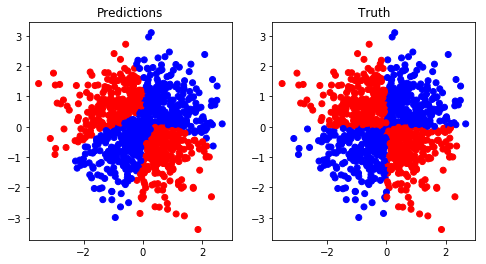

In [40]:
# Generating test data
x_test, y_test = gen_data(1000)

# Predicting labels using the MLP model
plt.rcParams['figure.figsize'] = 8, 4
preds = model2.predict_classes(x_test).reshape(-1,).astype(np.int8)

# Ploting the predictions against the ground truth labels
plt.subplot(121)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in preds])
plt.title('Predictions')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in y_test])
plt.title('Truth')
plt.show()